In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from src.image_generator import generate_images
from src.postprocess import non_mamima_suppression

pygame 2.0.0.dev6 (SDL 2.0.10, python 3.7.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
screen_size = (160, 120)

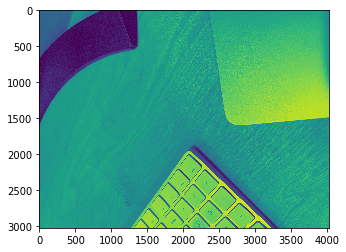

In [3]:
im = cv2.imread('tests/desk2.png')
im_gray = im.mean(axis=2) - im.mean()
plt.imshow(im_gray.reshape(im.shape[:-1]));

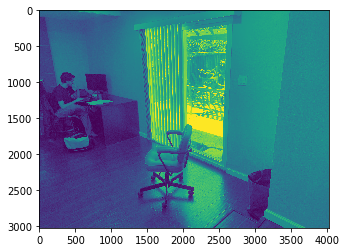

In [4]:
im2 = cv2.imread('tests/chair.png')
im2_gray = im2.mean(axis=2) - im2.mean()
plt.imshow(im2_gray.reshape(im2.shape[:-1]));

In [5]:
ds = cv2.resize(im_gray,(160, 120)).reshape((160, 120,1))
ds2 = cv2.resize(im2_gray,(160, 120)).reshape((160, 120,1))
ds_tns = np.array([ds,ds2])

In [6]:
model_path = 'models/mp_v3.hdf5'
model = load_model(model_path, custom_objects={'tf':tf})
y_hat = model.predict(ds_tns)

In [7]:
def show_results(x,y_hat):
    f, ax = plt.subplots(nrows=1, ncols=3,figsize=(15,10))
    ax[0].imshow(x.reshape(screen_size[::-1]))
    ax[1].imshow(y_hat.reshape(screen_size[::-1]),cmap='gray')

    # resulting figure
    ax[2].imshow(x.reshape(screen_size[::-1]), cmap='gray')
    ax[2].imshow(y_hat.reshape(screen_size[::-1]), cmap='jet', alpha=0.5)

    plt.show()

In [8]:
y_hat.shape

(2, 160, 120, 1)

In [9]:
yh_nms = [non_mamima_suppression(m) for m in y_hat]

In [10]:
yh_nms[0].shape

(160, 120, 1)

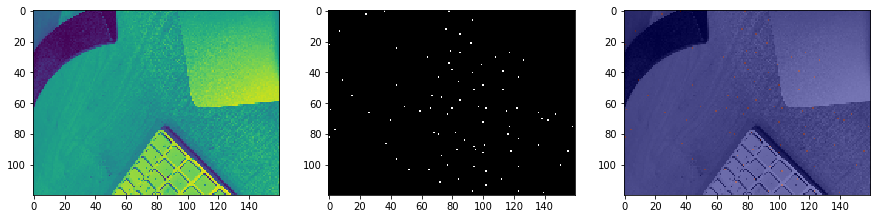

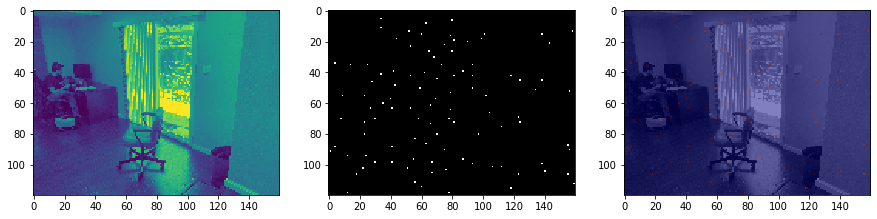

In [11]:
for ii in range(2):
    show_results(ds_tns[ii], yh_nms[ii])